## SMS Spam Classification with PyTorch
Overview:
This project focuses on building a neural network to classify SMS messages as spam or ham (non-spam). Using a PyTorch-based Multi-Layer Perceptron (MLP), we preprocess the text data, train the model, and analyze its performance.

Importing Libraries:



In [91]:
import torch  # PyTorch library for building and training neural networks.
import torch.nn as nn  # Submodule for defining neural network layers.
import torch.optim as optim  # Optimizer module for gradient-based optimization.
import matplotlib.pyplot as plt  # Visualization library for creating plots.
import pandas as pd  # Data manipulation and analysis library.
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text to numerical features using TF-IDF.
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating model performance.
import seaborn as sns  # Visualization library for enhanced plots


Next,  we clean up the data to make it suitable for training the model that to accurately classify messages as spam or ham. The steps involved include:

Removes unnecessary columns: Deletes columns that aren't needed for analysis.

Renames columns: Gives the columns clearer names.

Removes duplicates: Deletes any duplicate messages.

Standardizes text: Converts all text to lowercase for consistency.

Encodes the target variable: Replaces "ham" and "spam" with numbers (0 and 1) for machine learning.


In [92]:
# Load the dataset
data = pd.read_csv('spamdataset.csv', encoding='latin1')  # Update the path to your dataset

# Step 1: Drop unnecessary columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(columns=columns_to_drop, inplace=True)

# Step 2: Rename columns for clarity
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Step 3: Check and remove duplicate rows
data = data.drop_duplicates()

# Step 4: Standardize text data (convert to lowercase)
data['text'] = data['text'].str.lower()


# Save the cleaned dataset for future use
data.to_csv('cleaned_spam_dataset.csv', index=False)


This segment cleans and visualizes the dataset's label distribution:

Data Cleaning:

Removes unnecessary columns and duplicate rows.
Renames columns for clarity and standardizes text to lowercase.
Encodes labels (ham = 0, spam = 1) for analysis.
Label Distribution:

Calculates the count and percentage of spam and ham messages.
Identifies potential class imbalances.
Visualization:

Generates a pie chart displaying the proportion of ham and spam messages with counts and percentages for clear insights.
Importance:
Highlights dataset class distribution, aiding in understanding potential imbalances.
Ensures clean data for accurate model training.
Provides a clear, intuitive visual summary.

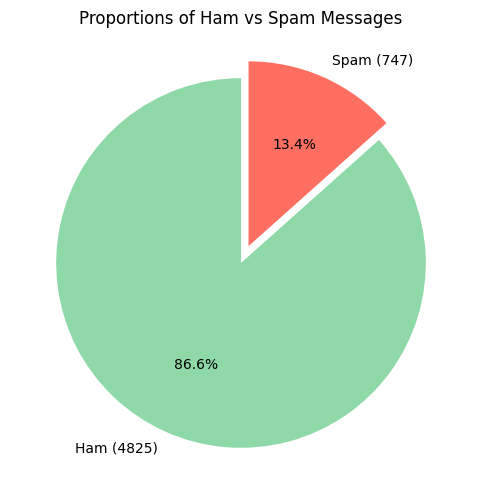

In [93]:
data = pd.read_csv('spamdataset.csv', encoding='latin1')  # Update the path to your dataset
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(columns=columns_to_drop, inplace=True)
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data = data.drop_duplicates()
data['text'] = data['text'].str.lower()
label_mapping = {'ham': 0, 'spam': 1}
data['target'] = data['target'].map(label_mapping)

# Count the occurrences of spam and ham
label_counts = spam_data['label'].value_counts()
labels = ['Ham', 'Spam']  # 0 = Ham, 1 = Spam
sizes = label_counts.values  # Counts of each label
percentages = (sizes / sizes.sum()) * 100  # Calculate percentages
colors = ['#8FD9A8', '#FF6F61']  # Colors for ham and spam

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=[f'{label} ({count})' for label, count in zip(labels, sizes)],  # Show counts next to labels
    colors=colors,
    autopct=lambda p: f'{p:.1f}%',  # Show percentages on slices
    startangle=90,
    explode=(0, 0.1)  # Slightly separate the spam slice
)
plt.title('Proportions of Ham vs Spam Messages')
plt.show()


This process converts text into numerical features for machine learning by focusing on:

Term Frequency (TF): How often a word appears in a message.

Inverse Document Frequency (IDF): Highlights unique words while reducing the weight of common words (e.g., "the," "and").

Key Details:

Max Features: Limits to the top 1000 important words for efficiency and relevance.

Stop Words: Removes common words that don’t aid classification.

Output: Creates a matrix where rows represent messages and columns represent word features.

The data is split into training (80%) and testing (20%) sets and converted to PyTorch tensors for compatibility with the model. This step ensures the model trains effectively on numerical input.

In [87]:
# Convert text to TF-IDF features with 1000 features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit to 1000 features
X = vectorizer.fit_transform(spam_data['text']).toarray()
y = spam_data['label'].values


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors for model training
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Display summary statistics for TF-IDF values
print(f"TF-IDF Matrix - Min: {X.min():.4f}, Max: {X.max():.4f}, Mean: {X.mean():.4f}")
print(f"Sparsity: {100 * (1 - (X > 0).sum() / X.size):.2f}% (percentage of zero values)")


TF-IDF Matrix - Min: 0.0000, Max: 1.0000, Mean: 0.0021
Sparsity: 99.47% (percentage of zero values)


#SpamClassifier Model
Here, we define a neural network (MLP) to classify SMS messages as spam or ham. It processes numerical features derived from TF-IDF vectorization through three fully connected layers. Here's how it works:

###Layers:
The input features are passed through two hidden layers, reducing the dimensions step-by-step.
The final layer outputs a single value, representing the probability of the message being spam.
###Activations:

ReLU Activation: Adds non-linearity, helping the model learn complex relationships in the data.
Sigmoid Activation: Converts the final output into a probability between 0 and 1.
###Purpose:

The model learns patterns in the text data that distinguish spam from ham and outputs a clear probability for classification.

In [80]:
# Define the SpamClassifier model
class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Input layer to hidden layer 1
        self.fc2 = nn.Linear(128, 64)        # Hidden layer 1 to hidden layer 2
        self.fc3 = nn.Linear(64, 1)          # Hidden layer 2 to output layer
        self.relu = nn.ReLU()                # ReLU activation for non-linearity
        self.sigmoid = nn.Sigmoid()          # Sigmoid activation for probability output

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model
input_dim = X_train.shape[1]
model = SpamClassifier(input_dim)

###Loss Function and Optimizer
Binary Cross-Entropy Loss (BCELoss):

Used for binary classification tasks.
Calculates the difference between predicted probabilities (e.g., spam/ham) and true labels.
Ensures the model penalizes incorrect predictions, helping it focus on reducing classification errors.
Adam Optimizer:

An advanced optimization algorithm combining momentum and adaptive learning rates.
Efficiently updates model weights to minimize the loss function.
Adjusts learning rates dynamically, ensuring faster convergence and stability during training.


In [90]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


Training: The model learns by processing data in mini-batches of size 32 for efficiency.

Loss Calculation: Measures prediction error using BCELoss (Binary Cross-Entropy).

Optimization: Updates weights via backpropagation using the Adam optimizer.

Tracking: Saves total loss for each epoch to monitor performance.

Visualization: Plotting a graph of loss over epochs to evaluate learning progress.

Epoch 1/10, Loss: 0.5253
Epoch 2/10, Loss: 0.4765
Epoch 3/10, Loss: 0.4432
Epoch 4/10, Loss: 0.4240
Epoch 5/10, Loss: 0.4121
Epoch 6/10, Loss: 0.3958
Epoch 7/10, Loss: 0.3886
Epoch 8/10, Loss: 0.3777
Epoch 9/10, Loss: 0.3752
Epoch 10/10, Loss: 0.3594


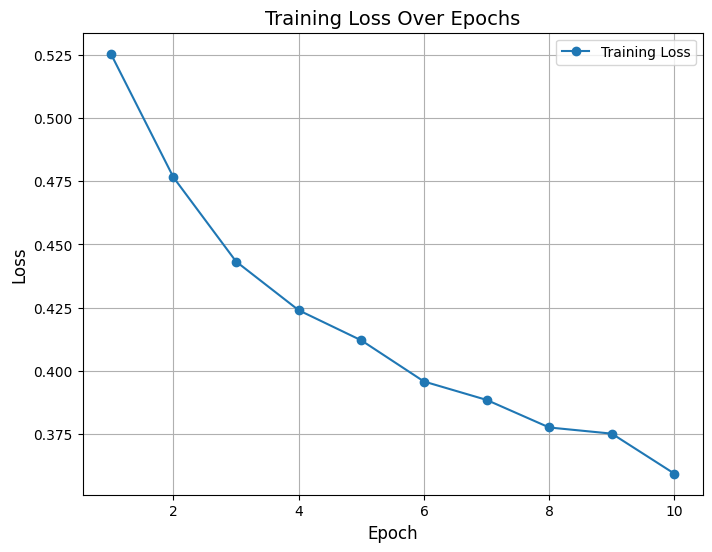

In [89]:
epochs = 10
batch_size = 32

# To store loss values for visualization
epoch_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, X_train_tensor.size(0), batch_size):
        # Get mini-batch
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Save epoch loss for visualization
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), epoch_losses, marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


###Evaluation and Visualization
Evaluation Mode: Switches the model to testing mode to ensure gradients aren’t calculated, improving efficiency.

Predictions: Predicts probabilities for test data and converts them into binary classifications (spam=1, ham=0) based on a threshold of 0.5.

Metrics: Calculates essential metrics like accuracy, precision, and recall to assess the model's ability to correctly classify messages.

Confusion Matrix: Breaks down predictions into True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) to analyze performance.

Visualization: Displays a heatmap of the confusion matrix, including numerical counts, percentages, and labeled components for easy interpretation.

Classification Report:
               precision    recall  f1-score   support

         Ham     0.9816    0.9938    0.9876       965
        Spam     0.9565    0.8800    0.9167       150

    accuracy                         0.9785      1115
   macro avg     0.9690    0.9369    0.9522      1115
weighted avg     0.9782    0.9785    0.9781      1115

Confusion Matrix:
 [[959   6]
 [ 18 132]]
Accuracy: 0.9785 (97.85%)
Precision (Spam): 0.9565 (95.65%)
Recall (Spam): 0.8800 (88.00%)


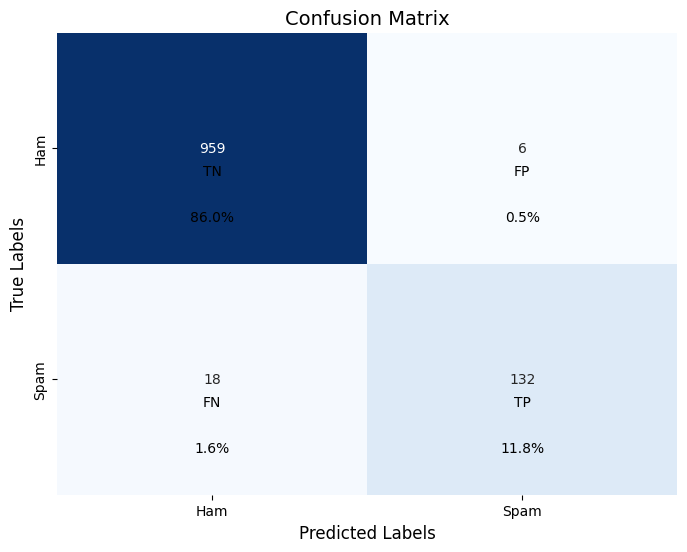

In [88]:
# Set the model to evaluation mode
model.eval()

# Evaluate the model
with torch.no_grad():  # Disable gradient calculations for efficiency
    y_pred = model(X_test_tensor)  # Predict probabilities for the test set
    y_pred_class = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (spam=1, ham=0)

# Generate and print a detailed classification report
report = classification_report(
    y_test,
    y_pred_class.numpy(),
    target_names=['Ham', 'Spam'],
    digits=4  # Ensure metrics are displayed with higher precision
)
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class.numpy())
print("Confusion Matrix:\n", cm)

# Calculate metrics manually
TN, FP, FN, TP = cm.ravel()  # Extract confusion matrix values

# Accuracy
accuracy = (TP + TN) / (TN + FP + FN + TP)
print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")

# Precision (for Spam)
precision_spam = TP / (TP + FP)
print(f"Precision (Spam): {precision_spam:.4f} ({precision_spam * 100:.2f}%)")

# Recall (for Spam)
recall_spam = TP / (TP + FN)
print(f"Recall (Spam): {recall_spam:.4f} ({recall_spam * 100:.2f}%)")

# Visualize the confusion matrix with additional details
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentages for the confusion matrix
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):  # Rows
    for j in range(2):  # Columns
        # Add TN, FP, FN, TP labels below the main numbers
        plt.text(j + 0.5, i + 0.6, f'{labels[i][j]}', ha='center', va='center', fontsize=10, color='black')
        # Add percentages slightly below the labels
        plt.text(j + 0.5, i + 0.8, f'{cm_percent[i, j]:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.show()